In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import os
from os import path
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords

plt.rc('figure',figsize=(17,13))
import plotly as p
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv('covidvaccine.csv', encoding = "ISO-8859-1")

C:\Users\saniy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
data.head()


user_name              user_location  \
0                 MyNewsNE                      Assam   
1            Shubham Gupta                        NaN   
2  Journal of Infectiology                        NaN   
3                     Zane                        NaN   
4     Ann-Maree OâConnor  Adelaide, South Australia   

                                    user_description      user_created  \
0  MyNewsNE a dedicated multi-lingual media house...  24-05-2020 10:18   
1  I will tell about all experiences of my life f...  14-08-2020 16:42   
2  Journal of Infectiology (ISSN 2689-9981) is ac...  14-12-2017 07:07   
3                                  Fresher than you.  18-09-2019 11:01   
4  Retired university administrator. Melburnian b...  24-01-2013 14:53   

   user_followers user_friends user_favourites user_verified  \
0            64.0         11.0           110.0         False   
1             1.0         17.0             0.0         False   
2           143.0        566.0             8.0         False   
3            29.0         25.0           620.0         False   
4            83.0        497.0         10737.0         False   

               date                                               text  \
0  18-08-2020 12:55  Australia to Manufacture Covid-19 Vaccine and ...   
1  18-08-2020 12:55  #CoronavirusVaccine #CoronaVaccine #CovidVacci...   
2  18-08-2020 12:46  Deaths due to COVID-19 in Affected Countries\n...   
3  18-08-2020 12:45  @Team_Subhashree @subhashreesotwe @iamrajchoco...   
4  18-08-2020 12:45  @michellegrattan @ConversationEDU This is what...   

                                            hashtags               source  \
0                                   ['CovidVaccine']      Twitter Web App   
1  ['CoronavirusVaccine', 'CoronaVaccine', 'Covid...  Twitter for Android   
2                                                NaN      Twitter Web App   
3                                                NaN  Twitter for Android   
4                                                NaN      Twitter Web App   

  is_retweet  
0      False  
1      False  
2      False  
3      False  
4      False

In [4]:
cols = ['text']
data = data[cols]
data.head()

text
0  Australia to Manufacture Covid-19 Vaccine and ...
1  #CoronavirusVaccine #CoronaVaccine #CovidVacci...
2  Deaths due to COVID-19 in Affected Countries\n...
3  @Team_Subhashree @subhashreesotwe @iamrajchoco...
4  @michellegrattan @ConversationEDU This is what...

In [5]:
#import sweetviz as sv

#report = sv.analyze(data)
#report.show_html('report.html', open_browser  = True)

In [6]:
data.drop_duplicates()

text
0       Australia to Manufacture Covid-19 Vaccine and ...
1       #CoronavirusVaccine #CoronaVaccine #CovidVacci...
2       Deaths due to COVID-19 in Affected Countries\n...
3       @Team_Subhashree @subhashreesotwe @iamrajchoco...
4       @michellegrattan @ConversationEDU This is what...
...                                                   ...
218889                    Get your #CovidVaccine ð¦ ð
218890  Saw a critically ill covid patient today, firs...
218891  I could use more verification on the Ukraine r...
218892  This gives a new meaning to the word UNHINGED!...
218893  In the first week of BioNTech Pfizer #CovidVac...

[218791 rows x 1 columns]

In [7]:
data['text'] = data['text'].astype('str') 

In [8]:
def clean(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'@', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'&amp', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    
    return text

data['text'] = data['text'].apply(clean)

data


text
0       australia to manufacture covid    vaccine and ...
1       coronavirusvaccine coronavaccine covidvaccine ...
2       deaths due to covid    in affected countriesre...
3        subhashree   stay safe  di    da             ...
4         this is what passes for leadership in our co...
...                                                   ...
218889                     get your covidvaccine         
218890  saw a critically ill covid patient today  firs...
218891  i could use more verification on the ukraine r...
218892  this gives a new meaning to the word unhinged ...
218893  in the first week of biontech pfizer covidvacc...

[218894 rows x 1 columns]

In [9]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
data['text'] = data['text'].apply(remove_stopwords)
data.head()

text
0  australia manufacture covid    vaccine give ci...
1  coronavirusvaccine coronavaccine covidvaccine ...
2  deaths due covid    affected countriesread       
3   subhashree   stay safe  di    da             ...
4    passes leadership country  voucher something...

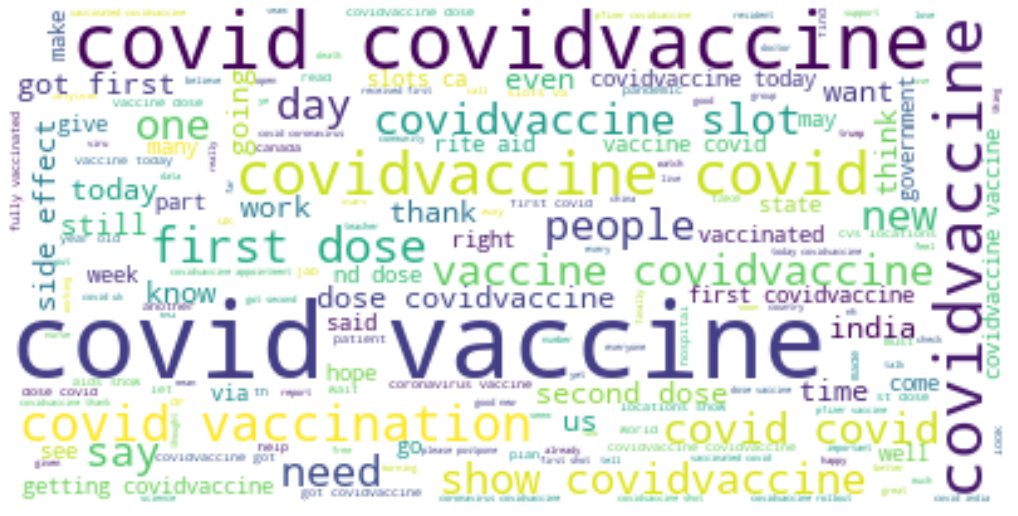

In [10]:
 import matplotlib.pyplot as plt

allWords = ' '.join([twts  for twts in data['text']])
wordCloud = WordCloud(max_words = 200, random_state = 21, background_color = 'white' ).generate(allWords)
plt.figure(figsize=(18,10))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


sid = SentimentIntensityAnalyzer()


In [12]:
data['Sentiment_scores'] = data['text'].apply(lambda tweet: sid.polarity_scores(tweet))

In [13]:
data['compound'] = data['Sentiment_scores'].apply(lambda x:x['compound'])

In [14]:
data['sentiment'] = data['compound'].apply(lambda score:  'pos' if score > 0 else "neut" if score ==0  else 'neg' )

In [15]:
data.head()

text  \
0  australia manufacture covid    vaccine give ci...   
1  coronavirusvaccine coronavaccine covidvaccine ...   
2  deaths due covid    affected countriesread          
3   subhashree   stay safe  di    da             ...   
4    passes leadership country  voucher something...   

                                    Sentiment_scores  compound sentiment  
0  {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...    0.5106       pos  
1  {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...    0.4404       pos  
2  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...   -0.1531       neg  
3  {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...    0.4404       pos  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000      neut

In [16]:
temp = data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

In [17]:
plt.figure(figsize=(8,6))

fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

<Figure size 576x432 with 0 Axes>

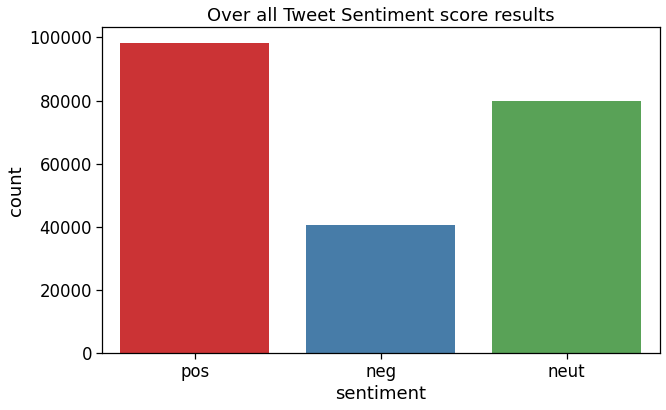

In [18]:
plt.figure(figsize=(10,6))
sns.set_context(context='notebook',font_scale=1.5)
sns.countplot(data['sentiment'],palette='Set1')
plt.title('Over all Tweet Sentiment score results');

In [19]:
Positive_tweet = data[data['sentiment']=='pos'].reset_index()
Negative_tweet = data[data['sentiment']=='neg'].reset_index()
Neutral_tweet = data[data['sentiment']=='neut'].reset_index()

In [24]:
def removeNestings(l):
    for i in l:
        if type(i) == list:
            removeNestings(i)
        else:
            all_negative_words.append(i)  

In [26]:
words=[]

for i in range(len(Negative_tweet['text'])):
    words.append(data['text'][i].split())
    
all_negative_words=[]

            
removeNestings(words)    

all_negative_words=pd.Series(np.array(all_negative_words))
common_words=all_negative_words.value_counts()[:70].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='70 Most Common Words In Negative Tweets')
fig.show()

In [28]:
words=[]

for i in range(len(Neutral_tweet['text'])):
    words.append(data['text'][i].split())
    
all_neutral_words=[]
def removeNestings(l):
    for i in l:
        if type(i) == list:
            removeNestings(i)
        else:
            all_neutral_words.append(i)  
            
removeNestings(words)    

all_neutral_words=pd.Series(np.array(all_neutral_words))
common_words=all_neutral_words.value_counts()[:70].rename_axis('Common Neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Words'], values='count',title='70 Most Common Words In Neutral Tweets')
fig.show()

In [29]:
words=[]

for i in range(len(Positive_tweet['text'])):
    words.append(data['text'][i].split())
    
all_positive_words=[]
def removeNestings(l):
    for i in l:
        if type(i) == list:
            removeNestings(i)
        else:
            all_positive_words.append(i)  
            
removeNestings(words)    

all_positive_words=pd.Series(np.array(all_positive_words))
common_words=all_positive_words.value_counts()[:70].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='70 Most Common Words In Positive Tweets')
fig.show()

In [30]:
common=set(all_positive_words).intersection(set(all_negative_words)).intersection(set(all_neutral_words))
common_list=list(common)

#common_words=all_negative_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Negative Words').reset_index(name='count')
#fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='70 Most Common Words In Negative Tweets')
#fig.show()

common_words=all_positive_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='Top 30 Unique Words In Positive Tweets')
fig.show()
common_words=all_neutral_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Words'], values='count',title='Top 30 Unique Words In Neutral Tweets')
fig.show()

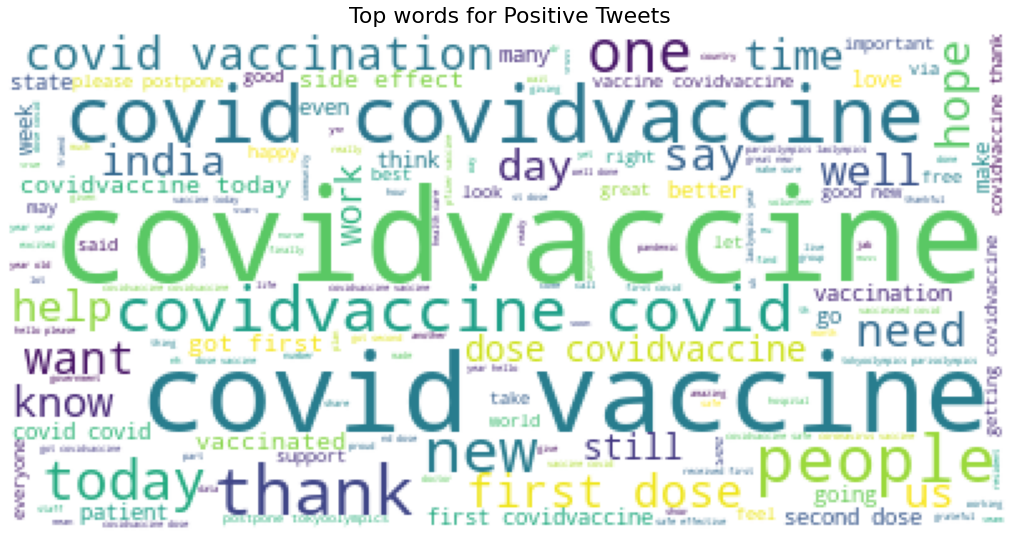

In [31]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in data.loc[data['sentiment'] == 'pos', 'text']))
plt.figure(figsize=(18,10))
plt.title('Top words for Positive Tweets', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

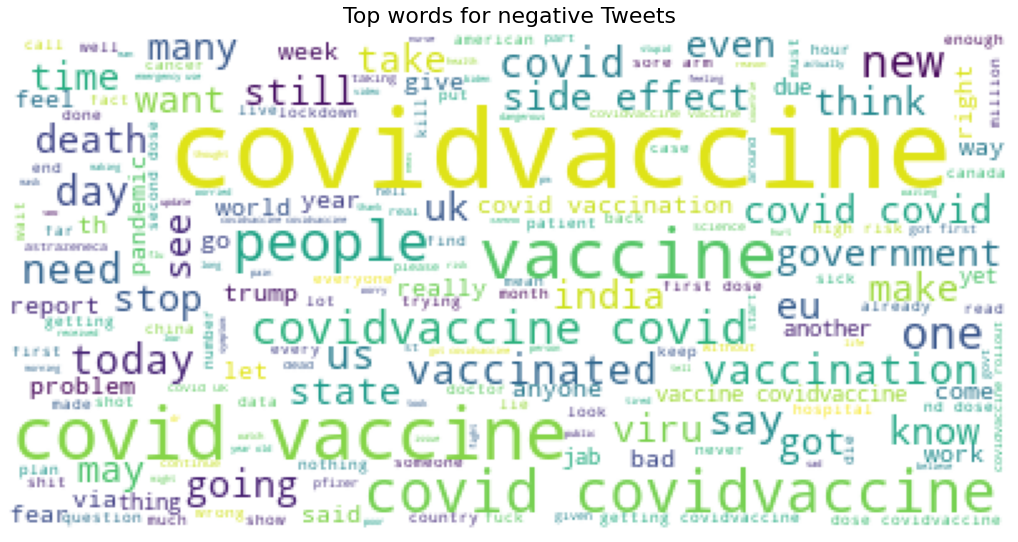

In [32]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in data.loc[data['sentiment'] == 'neg', 'text']))
plt.figure(figsize=(18,10))
plt.title('Top words for negative Tweets', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

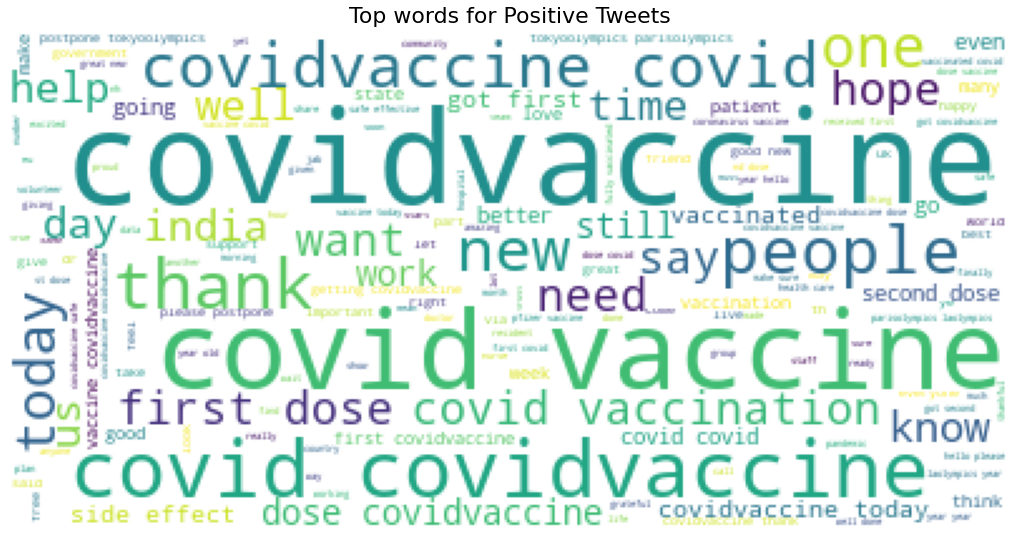

In [33]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in data.loc[data['sentiment'] == 'pos', 'text']))
plt.figure(figsize=(18,10))
plt.title('Top words for Positive Tweets', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

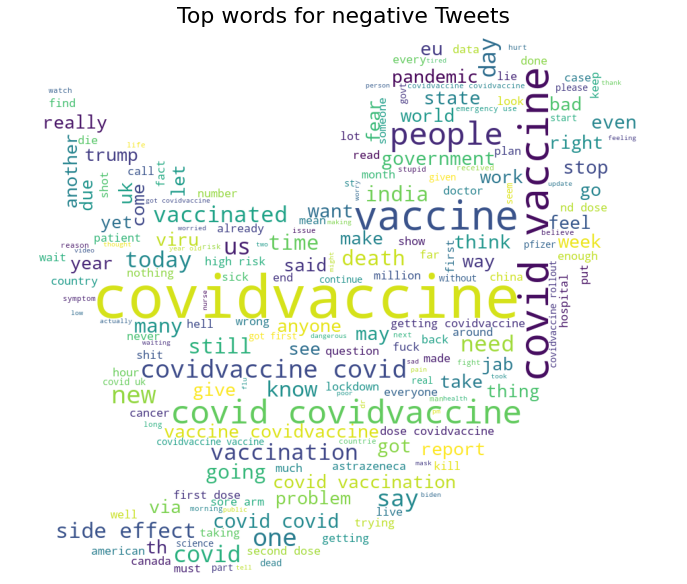

In [34]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

twitter_mask = np.array(Image.open(path.join(d, "twitter_mask.png")))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask = twitter_mask
)
wc.generate(' '.join(text for text in data.loc[data['sentiment'] == 'neg', 'text']))
plt.figure(figsize=(18,10))
plt.title('Top words for negative Tweets', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [35]:
import nltk
from nrclex import NRCLex

from nltk.corpus import stopwords

In [36]:
data['text'] = data['text'].str.strip()

In [37]:

def emo_tweet(word):
    word = [word for word in word if word not in stopwords.words('english')]
    word = str([cell.encode('utf-8') for cell in word])# to convert the text into utf-8 unicode
    str_text = NRCLex(word) 
    str_text = str_text.raw_emotion_scores
    str_text = pd.DataFrame(str_text,index=[0])
    str_text = pd.melt(str_text)
    str_text.columns = ('Emotions','Count')
    str_text = str_text.sort_values('Count')
    return str_text

In [38]:
Overall_tweet_emo = emo_tweet(data['text'])

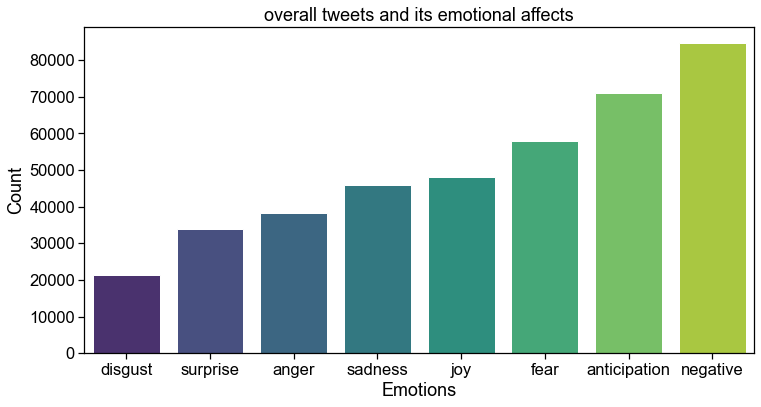

In [39]:
plt.figure(figsize=(12,6))
plt.title('overall tweets and its emotional affects')
sns.set_style('dark')
sns.set_context(context='notebook',font_scale=1.5)
sns.barplot(x='Emotions',y='Count',data = Overall_tweet_emo[0:8],palette='viridis');